In [1]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'HDFCBANK.NS.csv'
HDFC=pd.read_csv(FileName)

In [3]:
HDFC.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/1996,3.030,3.030,2.925,2.980,2.417746,350000
1,02/01/1996,2.980,3.025,2.950,2.975,2.413689,412000
2,03/01/1996,2.975,2.995,2.950,2.985,2.421802,284000
3,04/01/1996,2.985,2.980,2.940,2.965,2.405576,282000
4,05/01/1996,2.965,2.980,2.950,2.960,2.401519,189000


In [4]:
HDFC.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6447,23/08/2021,1529.849976,1533.150024,1508.650024,1524.599976,1524.599976,5421527
6448,24/08/2021,1530.000000,1564.500000,1527.449951,1558.849976,1558.849976,9190657
6449,25/08/2021,1552.099976,1564.800049,1548.000000,1557.400024,1557.400024,3863987
6450,26/08/2021,1550.000000,1571.000000,1543.449951,1554.800049,1554.800049,5559501
6451,27/08/2021,1552.000000,1558.650024,1545.250000,1548.449951,1548.449951,3191069


In [5]:
df1=HDFC.reset_index()['Close']

In [6]:
df1.shape

(6452,)

In [7]:
df1

0          2.980000
1          2.975000
2          2.985000
3          2.965000
4          2.960000
           ...     
6447    1524.599976
6448    1558.849976
6449    1557.400024
6450    1554.800049
6451    1548.449951
Name: Close, Length: 6452, dtype: float64

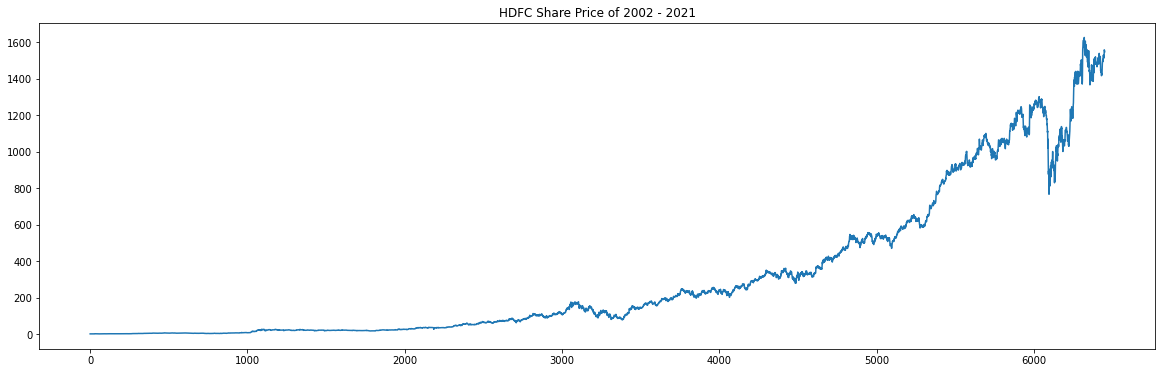

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('HDFC Share Price of 2002 - 2021')
plt.plot(df1)

In [9]:
HDFC.Date = pd.to_datetime(HDFC.Date)
HDFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6452 entries, 0 to 6451
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6452 non-null   datetime64[ns]
 1   Open       6452 non-null   float64       
 2   High       6452 non-null   float64       
 3   Low        6452 non-null   float64       
 4   Close      6452 non-null   float64       
 5   Adj Close  6452 non-null   float64       
 6   Volume     6452 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 353.0 KB


In [10]:
HDFC = HDFC.set_index('Date')

In [11]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     / 306 kB 925 kB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=57022c760fd212cafcb3d914bd1e635c51d91a82e06dacd69dbeda0749744cc9
  Stored in directory: /tmp/pip-ephem-wheel-cache-njqyn5uo/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [12]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 111 kB/s 


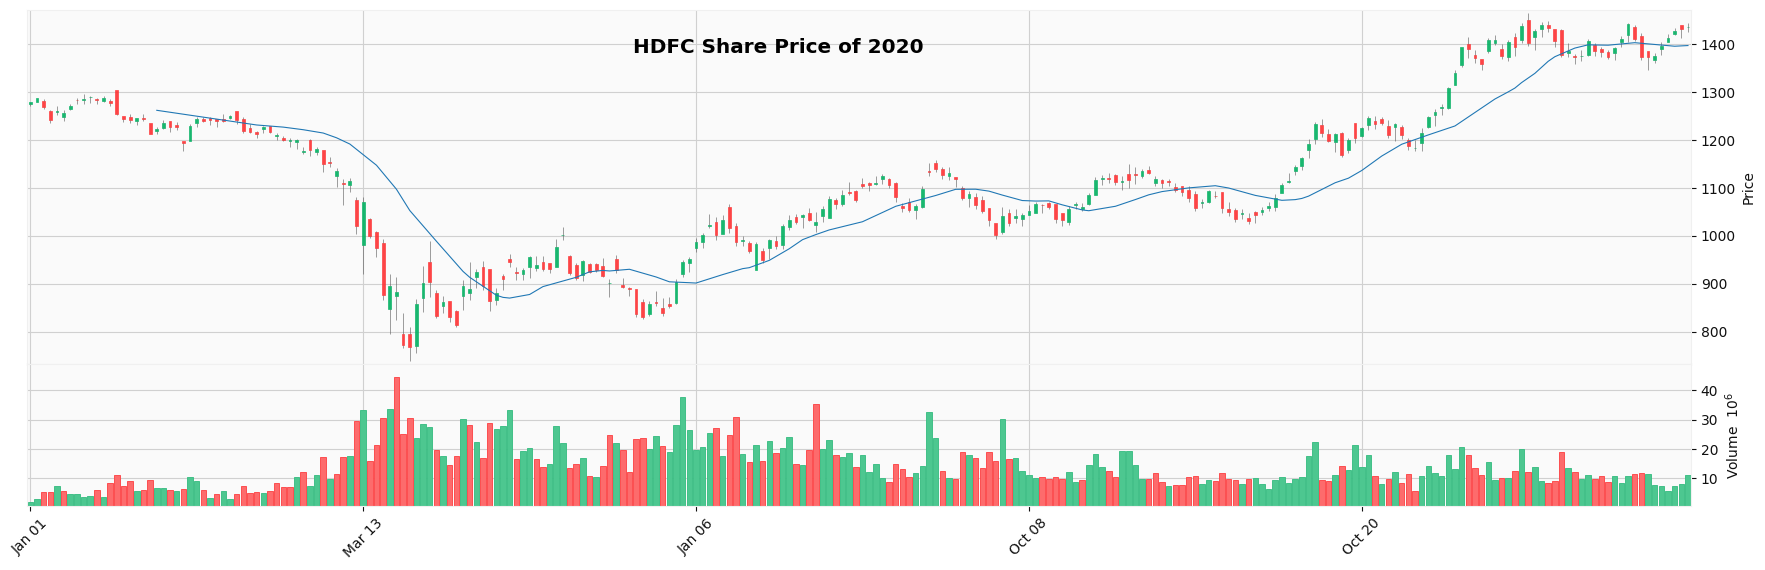

In [13]:
import mplfinance as mpf
mpf.plot(HDFC['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'HDFC Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[3.35546705e-04],
       [3.32468295e-04],
       [3.38625115e-04],
       ...,
       [9.57364020e-01],
       [9.55763262e-01],
       [9.51853620e-01]])

In [17]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size, test_size

(4839, 1613)

In [19]:
len(train_data), len(test_data)

(4839, 1613)

In [20]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [22]:
print(X_train)

[[3.35546705e-04 3.32468295e-04 3.38625115e-04 ... 6.43387719e-04
  7.01877512e-04 6.74171821e-04]
 [3.32468295e-04 3.38625115e-04 3.26311475e-04 ... 7.01877512e-04
  6.74171821e-04 5.97211567e-04]
 [3.38625115e-04 3.26311475e-04 3.23233065e-04 ... 6.74171821e-04
  5.97211567e-04 5.54113825e-04]
 ...
 [2.60735175e-01 2.59688526e-01 2.64706331e-01 ... 3.30153323e-01
  3.31461648e-01 3.26074430e-01]
 [2.59688526e-01 2.64706331e-01 2.64967989e-01 ... 3.31461648e-01
  3.26074430e-01 3.27182650e-01]
 [2.64706331e-01 2.64967989e-01 2.62412912e-01 ... 3.26074430e-01
  3.27182650e-01 3.29891666e-01]]


In [23]:
print(X_train.shape), print(y_train.shape)

(4738, 100)
(4738,)


(None, None)

In [24]:
print(X_test.shape), print(y_test.shape)

(1512, 100)
(1512,)


(None, None)

In [25]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [27]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
75/75 [==============================] - 21s 207ms/step - loss: 5.6310e-04 - val_loss: 0.0020
Epoch 2/100
75/75 [==============================] - 14s 192ms/step - loss: 2.2862e-05 - val_loss: 0.0027
Epoch 3/100
75/75 [==============================] - 14s 190ms/step - loss: 2.2495e-05 - val_loss: 0.0024
Epoch 4/100
75/75 [==============================] - 14s 191ms/step - loss: 2.1212e-05 - val_loss: 0.0027
Epoch 5/100
75/75 [==============================] - 14s 192ms/step - loss: 2.5186e-05 - val_loss: 0.0037
Epoch 6/100
75/75 [==============================] - 14s 192ms/step - loss: 2.2715e-05 - val_loss: 0.0019
Epoch 7/100
75/75 [==============================] - 14s 192ms/step - loss: 2.1140e-05 - val_loss: 8.7191e-04
Epoch 8/100
75/75 [==============================] - 14s 191ms/step - loss: 1.9827e-05 - val_loss: 0.0031
Epoch 9/100
75/75 [==============================] - 14s 190ms/step - loss: 3.1919e-05 - val_loss: 7.3778e-04
Epoch 10/100
75/75 [==================

In [30]:
import tensorflow as tf

In [31]:
tf.__version__

'2.6.0'

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

165.0443153572914

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

978.0909132398543

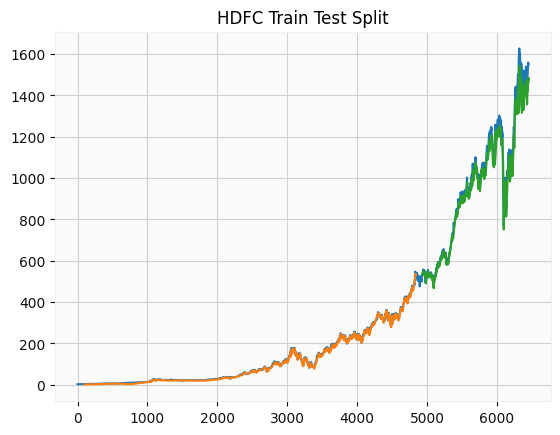

In [36]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('HDFC Train Test Split')
plt.show()

In [37]:
len(test_data)

1613

In [41]:
x_input=test_data[1513:].reshape(1,-1)
x_input.shape

(1, 100)

In [42]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [43]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9017475]
101
1 day input [0.88523686 0.88951582 0.88065005 0.87384674 0.84016896 0.86067113
 0.87898767 0.87809496 0.86809013 0.8551608  0.8743085  0.86916757
 0.86341096 0.88428252 0.90774006 0.9050926  0.86802857 0.86935223
 0.85328294 0.86205641 0.86100978 0.86953696 0.87267693 0.86264135
 0.86014781 0.85235942 0.88523686 0.90767843 0.89628832 0.88065005
 0.92036155 0.92814986 0.90906372 0.90789398 0.91134179 0.92414793
 0.9317824  0.92922731 0.92448658 0.93467615 0.92260872 0.92193149
 0.91158808 0.90989495 0.91035671 0.91361978 0.90937156 0.91602096
 0.91254234 0.90115222 0.90958711 0.91506662 0.91204984 0.91309647
 0.92587187 0.93132064 0.92716479 0.92328603 0.92073094 0.91386607
 0.9099565  0.91922247 0.94338799 0.9463433  0.93461452 0.92325522
 0.91401999 0.92316285 0.92150054 0.93476844 0.93578433 0.90416908
 0.88702235 0.89043934 0.88677606 0.8817275  0.88492901 0.87110698
 0.87169185 0.87674041 0.87440087 0.88181979 0.90065972 0.91269626
 0.91749861 0.92442503 0.92673384 

In [44]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [45]:
import matplotlib.pyplot as plt

In [46]:
len(df1)

6452

Text(0.5, 1.0, 'HDFC Prediction of Next 30 Days')

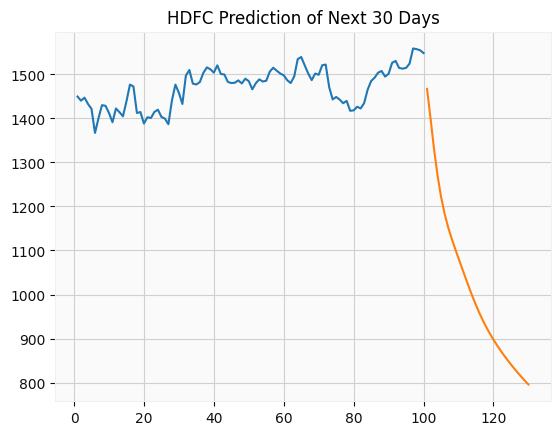

In [47]:
plt.plot(day_new,scaler.inverse_transform(df1[6352:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('HDFC Prediction of Next 30 Days')

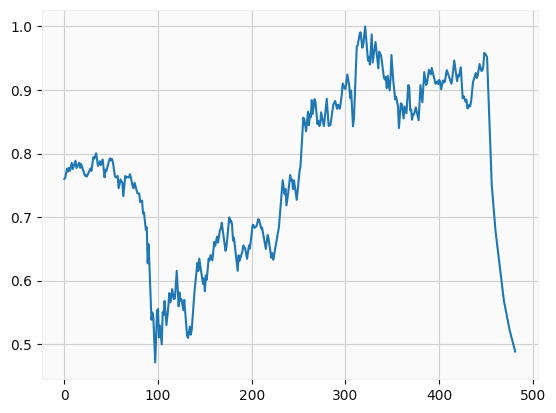

In [48]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[6000:])

In [49]:
df3=scaler.inverse_transform(df3).tolist()

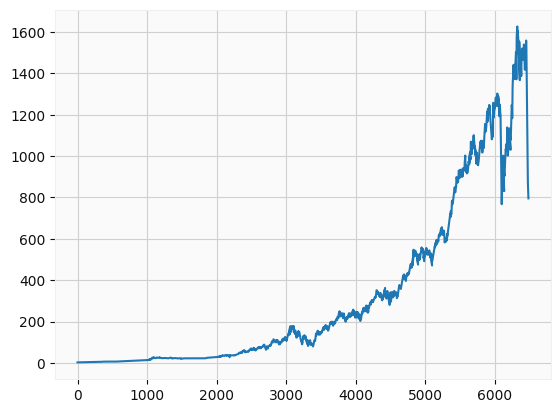

In [50]:
plt.plot(df3)